Importing Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

Loading Datasets

In [3]:
df =pd.read_csv("../Datasets.csv", encoding="ISO-8859-1")

#### Data Preprocessing

Preview Dataset

In [4]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# View the Dataframe size

In [5]:
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')

Rows: 9994
Columns: 21


Check the columns

In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Check every column's data type and non-null counts

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Check for duplicated data

In [10]:
df.duplicated().sum()

np.int64(0)

Check the unique values per column

In [11]:
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

### Data Cleaning

Rename the columns of dataset

In [12]:
renamed_cols = {
    'Row ID' : 'row_id',
    'Order ID' : 'order_id',    
    'Order Date' : 'order_date',
    'Ship Date' : 'ship_date',
    'Ship Mode' : 'ship_mode',
    'Customer ID' : 'customer_id',
    'Customer Name' : 'customer_name',
    'Segment' : 'segment',
    'Country' : 'country',
    'City' : 'city',
    'State' : 'state',
    'Postal Code' : 'postal_code',
    'Region' : 'region',
    'Product ID' : 'product_id',
    'Category' : 'category',
    'Sub-Category' : 'sub_category',
    'Product Name' : 'product_name',
    'Sales' : 'sales',
    'Quantity' : 'quantity',
    'Discount' : 'discount',
    'Profit' : 'profit'
}

# new_df =df.rename(columns=renamed_cols) # -- to store on a new dataframe

df =df.rename(columns=renamed_cols) 

In [13]:
print(df.columns.tolist())

['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales', 'quantity', 'discount', 'profit']


Fixing Datatypes

In [14]:
print(df.dtypes)

row_id             int64
order_id          object
order_date        object
ship_date         object
ship_mode         object
customer_id       object
customer_name     object
segment           object
country           object
city              object
state             object
postal_code        int64
region            object
product_id        object
category          object
sub_category      object
product_name      object
sales            float64
quantity           int64
discount         float64
profit           float64
dtype: object


Change the column Data Types

In [15]:
df['order_date']= pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

Drop the row we won't be using

In [16]:
df =df.drop('row_id', axis=1)

In [17]:
# Create profit_margin column
df['profit_margin'] = (df['profit']/df['sales']) * 100

In [18]:
#create Year column
df['year'] = df['order_date'].dt.year

In [19]:
# Create 'year_month' column
df['year_month'] = df['order_date'].dt.to_period('M')  

In [20]:
# Creating shipping_time column 
df['shipping_time'] = df['ship_date'] - df['order_date']

In [21]:
display(df)

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,...,sub_category,product_name,sales,quantity,discount,profit,profit_margin,year,year_month,shipping_time
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.00,2016,2016-11,3 days
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.00,2016,2016-11,3 days
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.00,2016,2016-06,4 days
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.00,2015,2015-10,7 days
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25,2015,2015-10,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,...,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,16.25,2014,2014-01,2 days
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,17.00,2017,2017-02,5 days
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,7.50,2017,2017-02,5 days
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,45.00,2017,2017-02,5 days


#### General Analysis

1. egional Analysis 
 to determine which region is the most profitable

,sales,profit
region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
South,391721.9050,46749.4303
Central,501239.8908,39706.3625


<Figure size 1000x600 with 0 Axes>

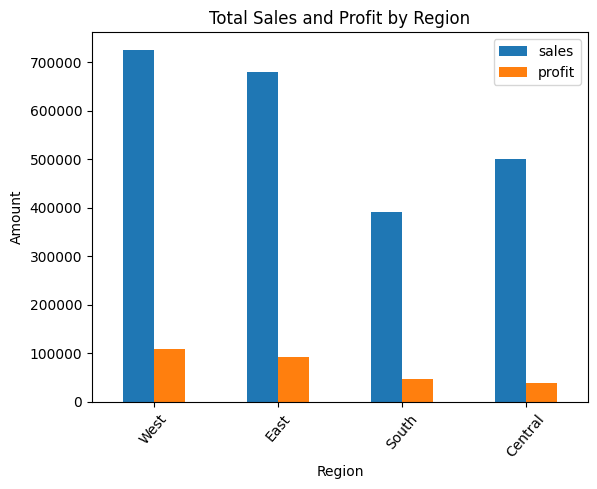

In [22]:

region_analysis = df.groupby('region')[['sales', 'profit']].sum().sort_values('profit', ascending=False)
display(region_analysis)


# Visualization of Sales and Profit by Region
plt.figure(figsize=(10,6))
region_analysis.plot(kind='bar')
plt.title('Total Sales and Profit by Region')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.xticks(rotation=50)
plt.legend(['sales', 'profit'])
plt.show()



2. Analysis by category and subcategory 
 To identify category to promote

,category,sub_category,sales,profit
0,Technology,Copiers,149528.0300,55617.8249
1,Technology,Phones,330007.0540,44515.7306
2,Technology,Accessories,167380.3180,41936.6357
3,Office Supplies,Paper,78479.2060,34053.5693
4,Office Supplies,Binders,203412.7330,30221.7633
5,Furniture,Chairs,328449.1030,26590.1663
6,Office Supplies,Storage,223843.6080,21278.8264
7,Office Supplies,Appliances,107532.1610,18138.0054
8,Furniture,Furnishings,91705.1640,13059.1436
9,Office Supplies,Envelopes,16476.4020,6964.1767


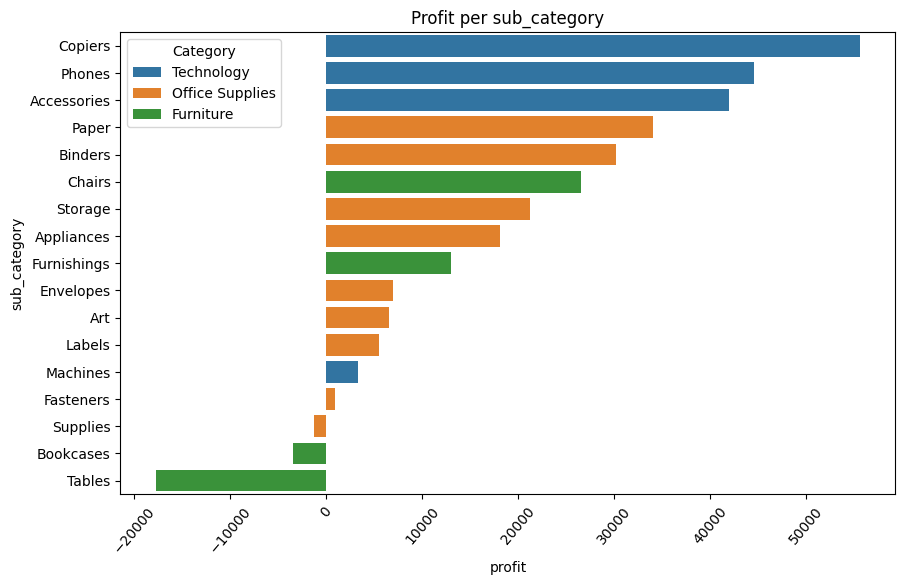

In [23]:
category_analysis =( 
    df.groupby(['category', 'sub_category'])[['sales', 'profit']]
    .sum()
    .sort_values('profit',ascending=False)
    .reset_index()
)
display(category_analysis)

# Visualization of Sales and Profit by Category and Sub-Category
plt.figure(figsize=(10,6))
sns.barplot(data=category_analysis, y='sub_category', x='profit', hue='category')
plt.title('Profit per sub_category')
plt.xlabel('profit')
plt.ylabel('sub_category')
plt.xticks(rotation=50)
plt.legend(title='Category')
plt.show()

3. Customer Segment Analysis
 to identifiy the most profitable customer segment

,sales,profit
segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


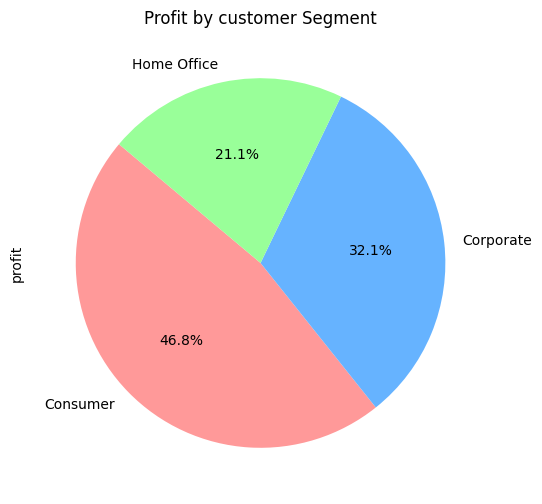

In [27]:
segment_analysis = df.groupby('segment')[['sales', 'profit']].sum().sort_values('profit', ascending=False)
display(segment_analysis)

# Visualization of Sales and Profit by Segment
plt.figure(figsize=(10,6))
segment_analysis['profit'].plot(kind= 'pie', colors=['#ff9999','#66b3ff', '#99ff99'], autopct='%1.1f%%', startangle=140)
plt.title('Profit by customer Segment')
plt.show()

4. Top & Bottom Products
 to identify which product to focus on

In [30]:
product_analysis = df.groupby('product_name')[['sales', 'profit']].sum().sort_values('profit', ascending=False)

# Top 10 products
print("\n Top 10 Products by Profit:")
print(product_analysis.head(10))

# Bottom 10 products
print("\n Bottom 10 Products by Profit:")
print(product_analysis.tail(10))



 Top 10 Products by Profit:
                                                        sales      profit
product_name                                                             
Canon imageCLASS 2200 Advanced Copier               61599.824  25199.9280
Fellowes PB500 Electric Punch Plastic Comb Bind...  27453.384   7753.0390
Hewlett Packard LaserJet 3310 Copier                18839.686   6983.8836
Canon PC1060 Personal Laser Copier                  11619.834   4570.9347
HP Designjet T520 Inkjet Large Format Printer -...  18374.895   4094.9766
Ativa V4110MDD Micro-Cut Shredder                    7699.890   3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta    14299.890   3717.9714
Plantronics Savi W720 Multi-Device Wireless Hea...   9367.290   3696.2820
Ibico EPK-21 Electric Binding System                15875.916   3345.2823
Zebra ZM400 Thermal Label Printer                    6965.700   3343.5360

 Bottom 10 Products by Profit:
                                                   